In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from astroML import stats as astroMLstats
from astroML.datasets import fetch_hogg2010test

from sklearn.mixture import GaussianMixture

from tqdm import tqdm

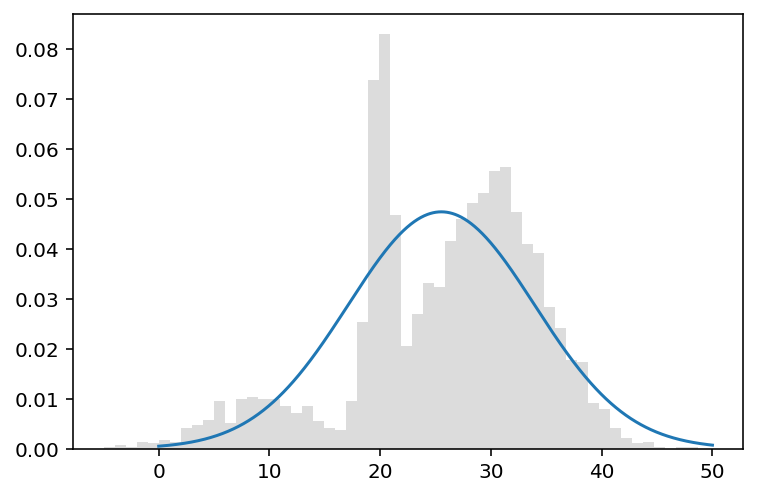

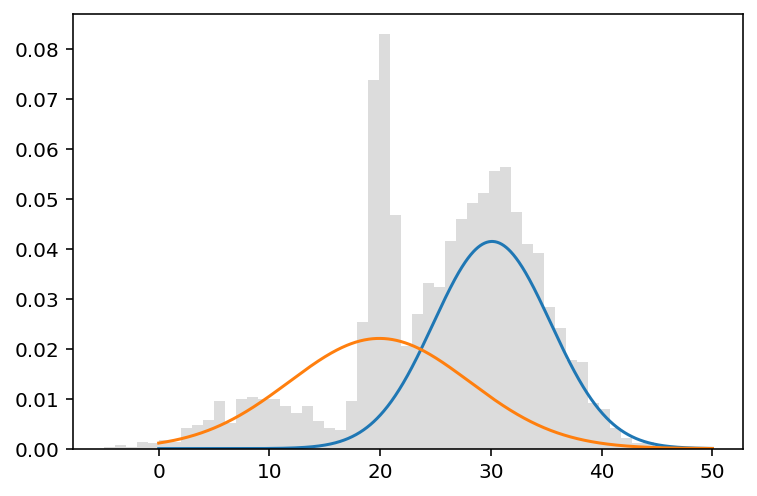

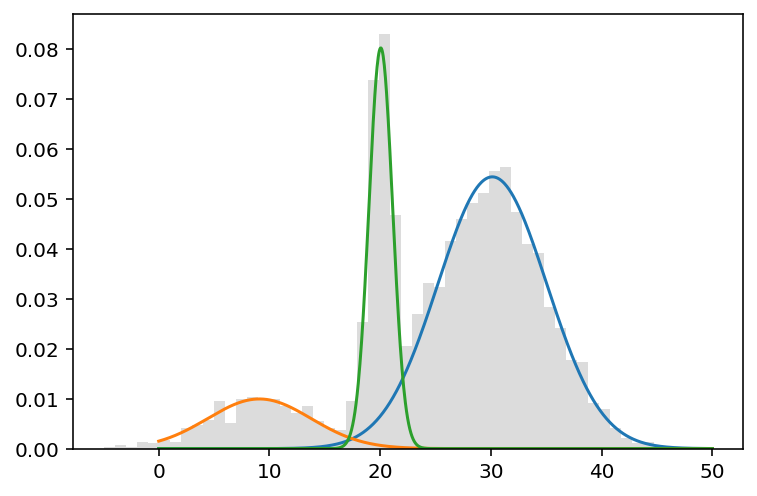

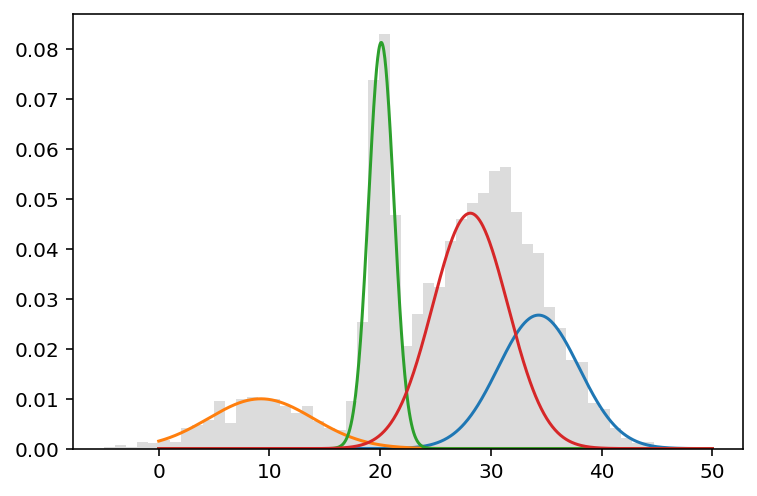

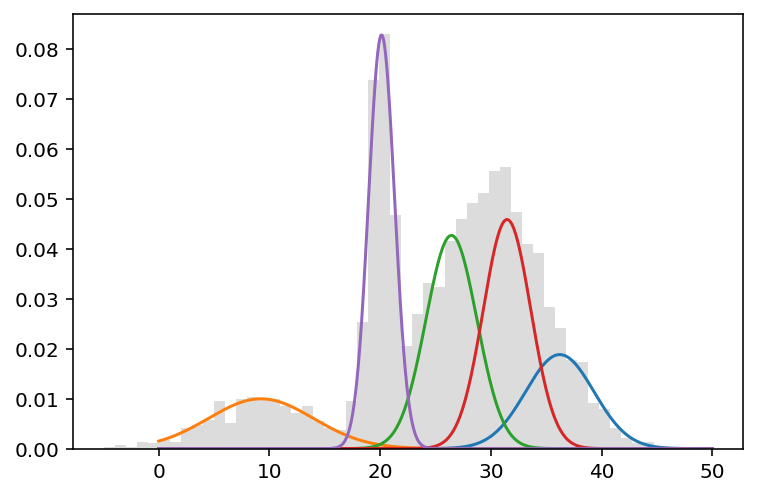

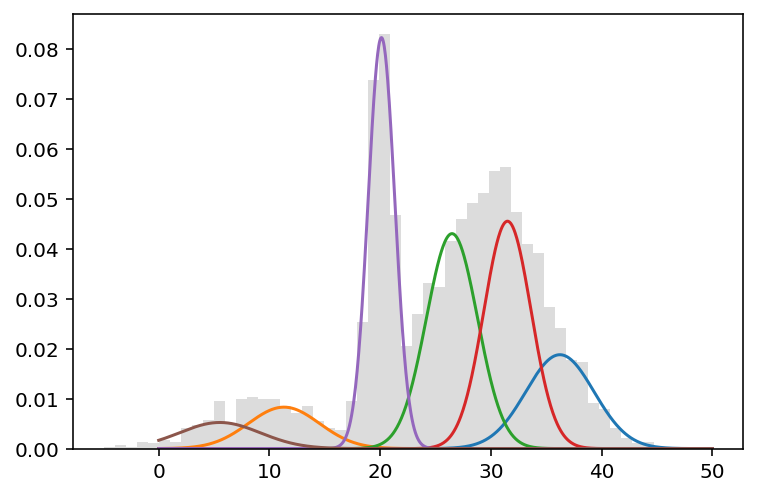

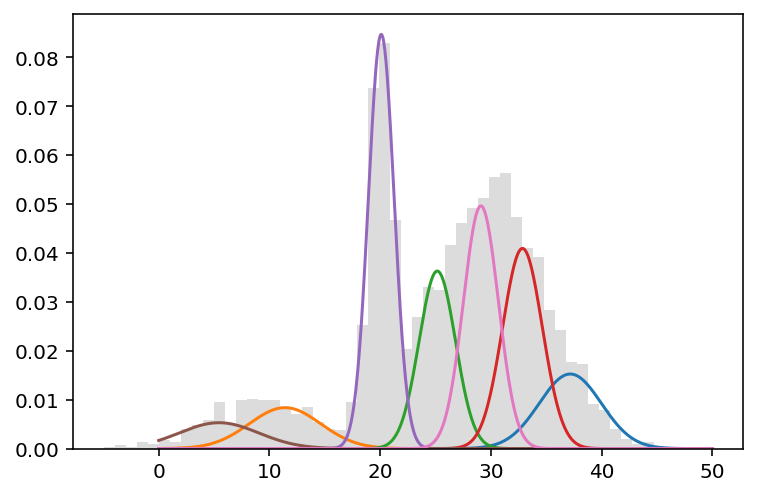

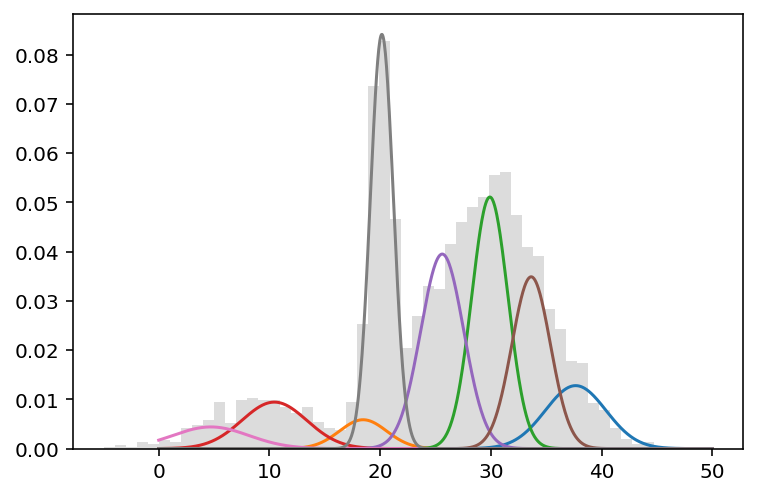

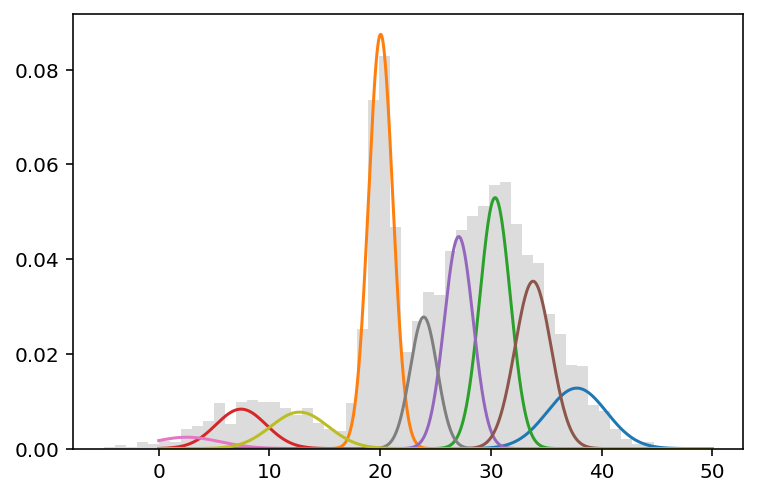

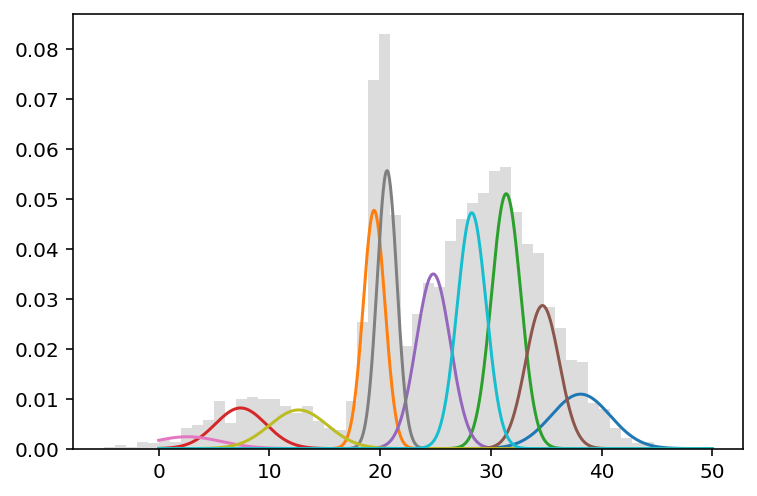

In [51]:
data = np.load(r"C:\Users\Admin\reps\astrostatistics_bicocca_2024\solutions\formationchannels.npy")
NvsAIC = np.zeros(shape = (10,2))

for n_comps in range(1,11):
    
    plt.hist(data, bins = int(np.sqrt(len(data))), density = True, color = 'gainsboro')
    
    x = np.linspace(0,50,1000)
    
    gm = GaussianMixture(n_components = n_comps, covariance_type='diag', random_state=0).fit(data)
    
    for i in range(n_comps):
        fit_g = gm.weights_[i]*norm.pdf(x, loc = gm.means_[i], scale = np.sqrt(gm.covariances_[i]))
        plt.plot(x, fit_g)
        
    NvsAIC[n_comps - 1] = [n_comps, gm.aic(data)]
    plt.show()

[[1.00000000e+00 2.09459726e+04]
 [2.00000000e+00 2.07545620e+04]
 [3.00000000e+00 2.00833759e+04]
 [4.00000000e+00 2.01037198e+04]
 [5.00000000e+00 2.01128555e+04]
 [6.00000000e+00 2.01228082e+04]
 [7.00000000e+00 2.01279021e+04]
 [8.00000000e+00 2.01304355e+04]
 [9.00000000e+00 2.01332970e+04]
 [1.00000000e+01 2.01441659e+04]]


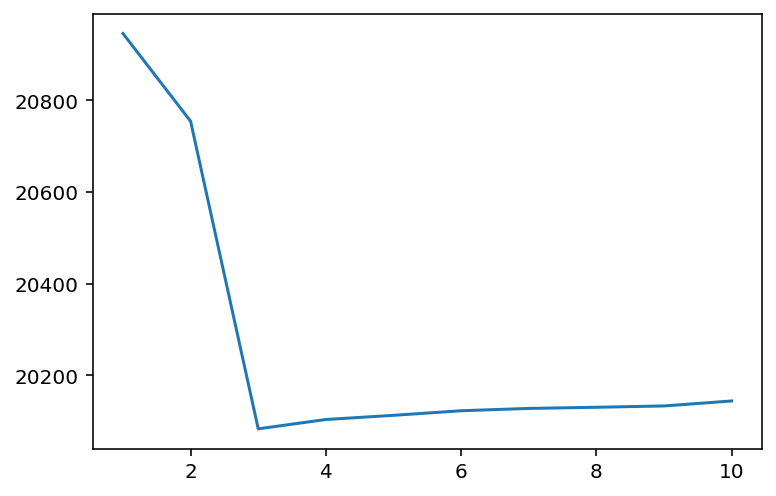

In [53]:
print(NvsAIC)
plt.plot(NvsAIC[:,0], NvsAIC[:,1])

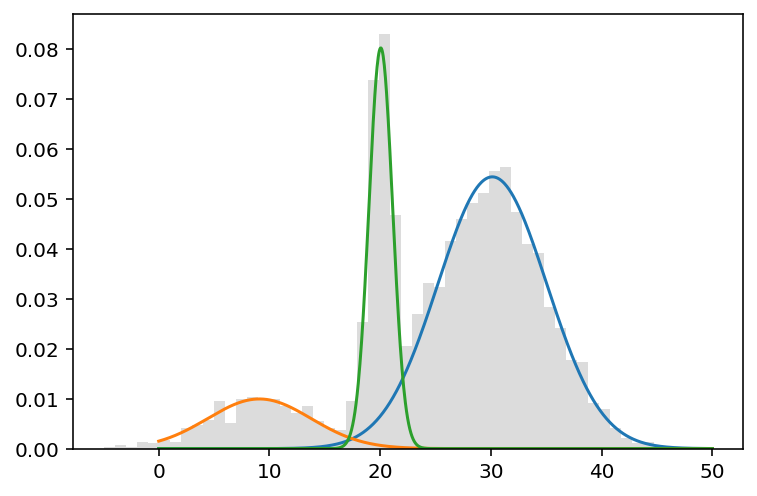

In [56]:
gm_good = GaussianMixture(n_components = 3, covariance_type='diag', random_state=0).fit(data)
x = np.linspace(0,50,1000)
plt.hist(data, bins = int(np.sqrt(len(data))), density = True, color = 'gainsboro')

for i in range(3):
        fit_g = gm_good.weights_[i]*norm.pdf(x, loc = gm_good.means_[i], scale = np.sqrt(gm_good.covariances_[i]))
        plt.plot(x, fit_g)

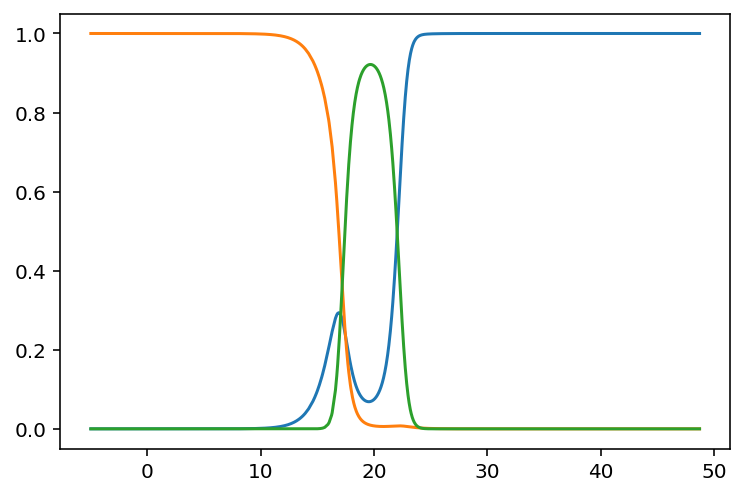

In [93]:
data_sorted = np.sort(data, axis = 0)

plt.plot(data_sorted, gm_good.predict_proba(data_sorted)[:,0])
plt.plot(data_sorted, gm_good.predict_proba(data_sorted)[:,1])
plt.plot(data_sorted, gm_good.predict_proba(data_sorted)[:,2])


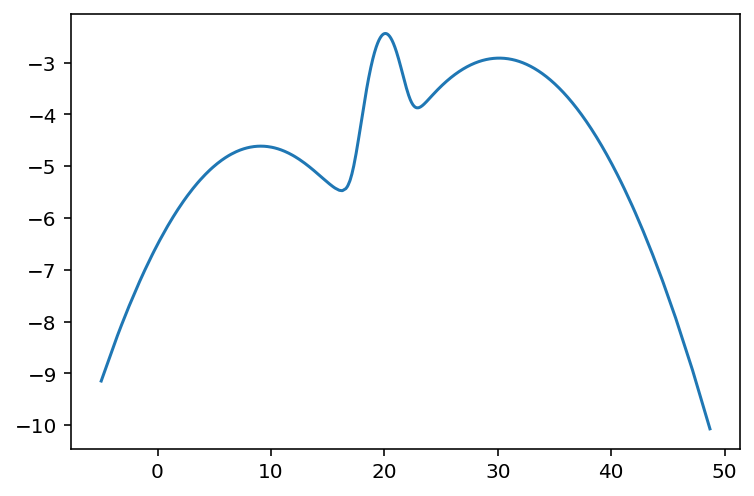

In [101]:
data_sorted = np.sort(data, axis = 0)

plt.plot(data_sorted, gm_good.score_samples(data_sorted))